In [1]:
from multiprocessing import Pool

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tqdm
from scipy.stats import binomtest

In [2]:
mother, father = ['CAR2493_F', 'CAR2494_M']

samples_lst = pd.read_csv('./data/interim/samples.txt', header=None)[0].to_list()
print(samples_lst)

['CAR2463', 'CAR2464', 'CAR2465', 'CAR2466', 'CAR2467', 'CAR2468', 'CAR2469', 'CAR2470', 'CAR2471', 'CAR2472', 'CAR2473', 'CAR2474', 'CAR2475', 'CAR2476', 'CAR2477', 'CAR2478', 'CAR2479', 'CAR2480', 'CAR2481', 'CAR2482', 'CAR2483', 'CAR2484', 'CAR2485', 'CAR2486', 'CAR2487', 'CAR2488', 'CAR2489', 'CAR2490', 'CAR2491', 'CAR2492', 'CAR2493_F', 'CAR2494_M']


In [35]:
d = []
for i, proband in enumerate(samples_lst[:-2], 1):
    try:
        cur_df = pd.read_csv(f'./data/interim/cor_results/own_assignment/{proband}.csv', index_col=0)
        cur_df = cur_df[cur_df.TYPE == 'SNP']
        print(proband, len(cur_df))
        d.append([proband, len(cur_df)])
    except:
        pass
    if i % 10 == 0:
        print()


CAR2463 22
CAR2464 29
CAR2465 20
CAR2466 22
CAR2467 16
CAR2468 18
CAR2469 20
CAR2470 25
CAR2472 20

CAR2473 21
CAR2474 12
CAR2475 26
CAR2476 22
CAR2477 24
CAR2478 20
CAR2479 23
CAR2480 22
CAR2481 17
CAR2482 21

CAR2483 23
CAR2484 21
CAR2485 16
CAR2486 16
CAR2487 29
CAR2488 20
CAR2489 16
CAR2490 18
CAR2491 18
CAR2492 20



In [32]:
cur_df[[x for x in cur_df.columns if 'GT' in x or 'AD' in x]]

,CAR2489.GT,CAR2489.AD,CAR2493_F.GT,CAR2493_F.AD,CAR2494_M.GT,CAR2494_M.AD
415563,A|G,[ 7 10 0],A|G,[11 15 0],T/T,[ 0 0 11]
2812149,G/A,[ 7 13 0],C|C,[ 0 0 13],G|C,[15 0 6]
3187644,C|A,[14 8 0],C|A,[39 16 0],T/T,[ 1 0 50]
3470669,G|T,[ 6 0 11],G/A,[ 8 10 0],A/A,[ 0 13 0]
4428790,C|A,[20 12 0],A|A,[ 0 23 0],G|G,[ 1 0 23]
5943386,T|A,[11 0 8],T/T,[20 0 0],G|G,[ 0 18 0]
6235367,G/T,[ 9 12 0],G/G,[27 0 0],A/A,[ 0 0 16]
8357744,A/G,[11 0 15],T|T,[ 0 17 0],A/A,[21 0 0]
12741566,A|T,[9 9 0],A/T,[15 9 0],G|G,[ 0 0 17]
13432213,G/C,[10 0 4],G/C,[19 0 3],T/T,[ 0 12 0]


In [36]:
labels = ['ctrl'] * 9 + ['nem-shok'] * 10 + ['nem'] * 10
dnms = pd.DataFrame(d, columns=['proband', 'dnm'])
dnms['grp'] = labels

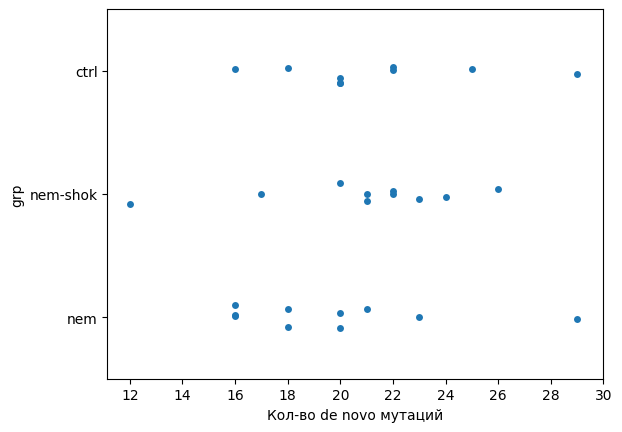

In [40]:
sns.stripplot(dnms, x='dnm', y='grp')

max_ctrl_val = dnms[(dnms['grp'] == 'ctrl')]['dnm'].max()
# plt.vlines(max_ctrl_val * 1.05, 0, 2, 'red', 'dashed', '0.02', alpha=0.5,)

plt.xlabel('Кол-во de novo мутаций')
# plt.xscale('log')
# plt.savefig('./figures/dnv_mend_ratio.pdf');
plt.xticks(range(12, 31, 2))
plt.show()